<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/linear/Kaggle_Weather_in_Szeged_2006_2016_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as p
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Getting Data 

In [4]:
df=pd.read_csv("/content/weatherHistory.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36903 entries, 0 to 36902
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            36903 non-null  object 
 1   Summary                   36903 non-null  object 
 2   Precip Type               36903 non-null  object 
 3   Temperature (C)           36903 non-null  float64
 4   Apparent Temperature (C)  36903 non-null  float64
 5   Humidity                  36903 non-null  float64
 6   Wind Speed (km/h)         36903 non-null  float64
 7   Wind Bearing (degrees)    36903 non-null  float64
 8   Visibility (km)           36903 non-null  float64
 9   Loud Cover                36903 non-null  float64
 10  Pressure (millibars)      36903 non-null  float64
 11  Daily Summary             36903 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.4+ MB


In [6]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
df["Humidity_2"]=df["Humidity"]

In [8]:
df=df.drop(columns="Humidity")

In [9]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Humidity_2                  0
dtype: int64

In [10]:
df["Precip Type"].value_counts()

rain    32827
snow     4076
Name: Precip Type, dtype: int64

In [11]:
df["Precip Type"]=df["Precip Type"].replace(np.nan,"rain")

In [12]:
df["Visibility (km)"].mean()

10.101371576836572

In [13]:
df["Visibility (km)"]=df["Visibility (km)"].replace(np.nan,df["Visibility (km)"].mean())

In [14]:
df["Loud Cover"] = df["Loud Cover"].replace(np.nan,df["Loud Cover"].median())

In [15]:
df["Pressure (millibars)"]=df["Pressure (millibars)"].replace(np.nan,df["Pressure (millibars)"].mean())

In [16]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Humidity_2                  0
dtype: int64

In [17]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Humidity_2
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0.83


Visualisation of Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


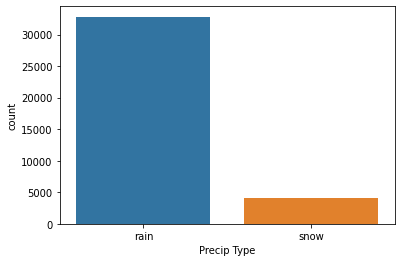

In [18]:
plt1=sns.countplot('Precip Type',data=df)

Getting the model ready

In [19]:
df=df.drop(columns=["Formatted Date","Summary","Daily Summary"])

In [20]:
df["Precip Type"]=df["Precip Type"].replace("rain",1)

In [21]:
df["Precip Type"]=df["Precip Type"].replace("snow",0)

In [22]:
#printing the final table
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Humidity_2
0,1,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,0.89
1,1,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,0.86
2,1,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,0.89
3,1,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,0.83
4,1,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,0.83


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36903 entries, 0 to 36902
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               36903 non-null  int64  
 1   Temperature (C)           36903 non-null  float64
 2   Apparent Temperature (C)  36903 non-null  float64
 3   Wind Speed (km/h)         36903 non-null  float64
 4   Wind Bearing (degrees)    36903 non-null  float64
 5   Visibility (km)           36903 non-null  float64
 6   Loud Cover                36903 non-null  float64
 7   Pressure (millibars)      36903 non-null  float64
 8   Humidity_2                36903 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [24]:
df.describe()

,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Humidity_2
count,36903.000000,36903.000000,36903.000000,36903.000000,36903.000000,36903.000000,36903.0,36903.000000,36903.000000
mean,0.889548,12.020123,10.921791,10.928456,189.607430,10.101372,0.0,1001.480701,0.718558
std,0.313456,9.522323,10.655240,7.025900,107.049411,3.758558,0.0,125.129638,0.193675
min,0.000000,-16.666667,-24.233333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,4.994444,2.527778,5.892600,118.000000,9.708300,0.0,1011.910000,0.590000
50%,1.000000,12.088889,12.088889,9.982000,186.000000,9.982000,0.0,1016.670000,0.770000
75%,1.000000,18.883333,18.883333,14.312900,290.000000,11.270000,0.0,1021.410000,0.880000
max,1.000000,39.905556,38.377778,63.852600,359.000000,16.100000,0.0,1046.380000,1.000000


Splitting the data into Training and Testing 

In [25]:
X=df.drop(columns="Apparent Temperature (C)")
Y=df["Apparent Temperature (C)"]

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 )

In [27]:
print(X_train.shape,X_test.shape)

(29522, 8) (7381, 8)


In [28]:
print(Y_train.shape,Y_test.shape)

(29522,) (7381,)


In [29]:
from sklearn.linear_model import LinearRegression as l_reg

In [30]:
model = l_reg()

In [31]:
model.fit(X_train,Y_train)

LinearRegression()

Accuracy

In [32]:
x=model.predict(X_test)
x

array([-4.61840085,  9.07298488, 25.72603974, ..., 20.45193125,
        7.54578628, 24.83130076])

In [33]:
from sklearn.metrics import r2_score
r2_score(Y_test,x)

0.9901782394713291

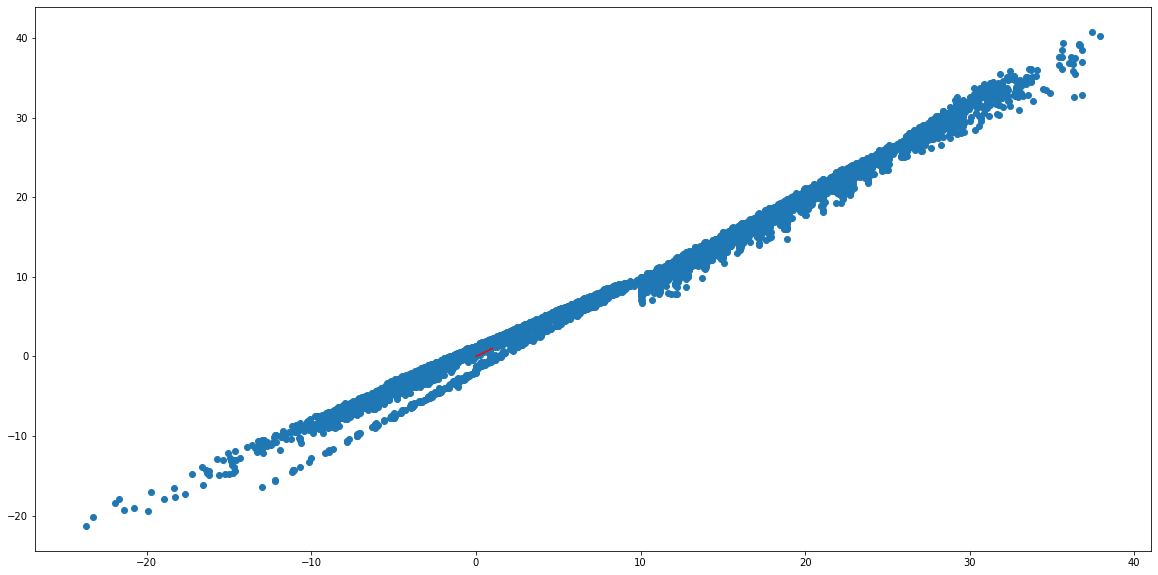

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(Y_test,x)
plt.plot([0,1],[0,1],color='r')
plt.show()